In [1]:
import pandas as pd
print ("pandas", pd.__version__)

import numpy as np
print ("numpy", np.__version__)
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
print ("seaborn", sns.__version__)


pandas 1.1.3
numpy 1.19.2
seaborn 0.11.0


In [2]:
Data= pd.read_excel("Data.xlsx", skiprows=2)
Data

,lfdn,external_lfdn,tester,dispcode,lastpage,quality,duration,v_3,v_4,v_5,...,v_177,v_178,v_179,v_180,v_164,v_161,v_163,v_165,v_196,browser
0,38,0,Kein Tester,Beendet (31),6898888,Null,610,mÃ¤nnlich,1957,Masterabschluss,...,teils-teils,stimme eher zu,stimme nicht zu,stimme nicht zu,neutral,Ja,Null,Null,Null,Mozilla/5.0 (Android 10; Mobile; rv:89.0) Geck...
1,39,0,Kein Tester,Beendet nach Unterbrechung (32),6898888,Null,-1,weiblich,1966,Allgemeine Hochschulreife / Abitur,...,stimme nicht zu,stimme nicht zu,teils-teils,stimme zu,2,Nein,Sonstige und zwar:,Eigenverantwortung wie in Schweden,Null,Mozilla/5.0 (Linux; Android 10; POT-LX1) Apple...
2,40,0,Kein Tester,Beendet (31),6898888,Null,311,mÃ¤nnlich,1990,Allgemeine Hochschulreife / Abitur,...,Null,Null,Null,Null,2,0,Null,Null,Null,Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like M...
3,41,0,Kein Tester,Beendet (31),6898888,Null,177,weiblich,1996,Allgemeine Hochschulreife / Abitur,...,Null,Null,Null,Null,neutral,Ja,Null,Null,Gerne weniger Text auf eine Frage-Seite.,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
4,42,0,Kein Tester,Beendet (31),6898888,Null,442,mÃ¤nnlich,1996,Bachelorabschluss,...,stimme eher zu,stimme zu,teils-teils,teils-teils,neutral,Nein,"Keinen Lockdown (Bsp.: USA, Brasilien)",Null,Null,Mozilla/5.0 (Linux; Android 8.0.0; FIG-LX1) Ap...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,142,0,Kein Tester,Beendet (31),6898888,Null,296,mÃ¤nnlich,1996,Fachhochschulreife,...,stimme zu,stimme eher nicht zu,teils-teils,stimme eher zu,4,Ja,Null,Null,Null,Mozilla/5.0 (Linux; Android 10; EML-L29) Apple...
59,143,0,Kein Tester,Beendet (31),6898888,Null,531,mÃ¤nnlich,1988,Allgemeine Hochschulreife / Abitur,...,stimme eher zu,teils-teils,stimme nicht zu,stimme eher zu,2,Nein,"Kurzen, strikten Lockdown (Bsp.: China, Austra...",Null,Null,Mozilla/5.0 (Linux; Android 10; ONEPLUS A6013)...
60,144,0,Kein Tester,Beendet (31),6898888,Null,289,mÃ¤nnlich,1997,Allgemeine Hochschulreife / Abitur,...,stimme eher zu,stimme nicht zu,stimme nicht zu,stimme nicht zu,4,Ja,Null,Null,Null,Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like M...
61,145,0,Kein Tester,Beendet (31),6898888,Null,470,mÃ¤nnlich,1990,Masterabschluss,...,Null,Null,Null,Null,neutral,Ja,Null,Null,Null,Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like M...


In [ ]:
Data.describe


In [ ]:
Data.head

In [ ]:
Data.loc[1]

In [ ]:
#Balken = Data.loc[:,["v_177", "v_178", "v_179", "v_180"]]
Balken = Data.loc[:,"v_179"]
Balken.value_counts()

In [ ]:
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/horizontal_barchart_distribution.html#sphx-glr-gallery-lines-bars-and-markers-horizontal-barchart-distribution-py
category_names = ['Stimme nicht zu', 'Stimme eher nicht zu',
                  'teils-teils', 'Stimme eher zu', 'Stimmen zu']
results = {
    'Seit meiner Impfung fühle ich mich sicherer als zuvor.': [2, 1, 7, 12, 19],
    'Die aktuellen EinschrÃ¤nkungen sollten nur für Nicht-Geimpfte gelten.': [9, 7, 14, 6, 5],
    'Es ist Überflüssig geworden, sich an die Maßnahmen zu halten.': [20, 10, 10, 0, 1],
    'Ich habe nichts an meiner Verhaltensweise verändert.': [10, 9, 10, 5, 7]
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        #ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()

In [ ]:
Balken = Data.loc[:,"v_3"]
Balken.value_counts()

In [ ]:
# https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Männlich', 'Weiblich', 'divers'
sizes = [40, 22, 1]
explode = (0.1, 0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

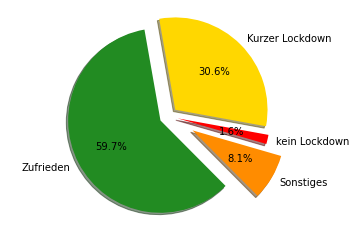

In [4]:
# https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Zufrieden', 'Sonstiges', 'kein Lockdown', 'Kurzer Lockdown'
sizes = [37, 5, 1, 19]
explode = (0.1, 0.3, 0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=100, colors=["forestgreen", "darkorange", "red", "gold" ])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
plt.savefig('Meinung.png')
plt.show()

In [3]:
Balken = Data.loc[:,"v_4"]
Balken.rename("Alter")
Balken.value_counts()
Balken

0     1957
1     1966
2     1990
3     1996
4     1996
      ... 
58    1996
59    1988
60    1997
61    1990
62    1994
Name: v_4, Length: 63, dtype: int64

<AxesSubplot:xlabel='v_4'>

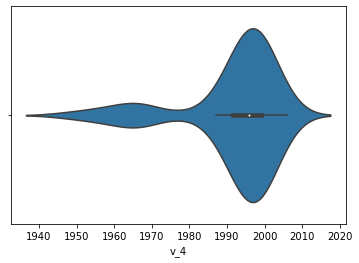

In [5]:
sns.violinplot(x=Balken )